In [474]:
import pandas as pd
import seaborn as sns

In [550]:
hmr={}
for cell in ['b','cd3','cd4','cd8','gran','mono','nk','wbc']:
    b=pd.read_table('data/hmr/'+cell,header=None,usecols=[1,2])
    hmr[cell]=(b[2]-b[1]).sum()/(3.2*10**9)

In [551]:
b=pd.read_csv('data/hmr/sim',header=None)
hmr['all']=(b[2]-b[1]).sum()/(3.2*10**9)

In [552]:
df=pd.DataFrame.from_dict(hmr,orient='index',columns=['Hypomethylated'])

<Axes: >

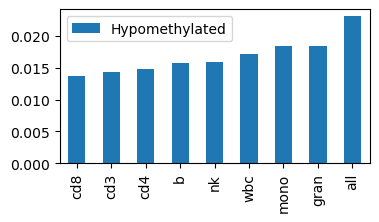

In [553]:
df.sort_values('Hypomethylated').plot(kind='bar',figsize=(4,2))

In [535]:
df.T['all'].values[0].round(3)

0.023

In [544]:
b=pd.read_csv('data/hmr/sim',header=None)
b.columns=['ch','beg','end','b','cd3','cd4','cd8','gran','mono','neo','nk','wbc']
b.shape

(68064, 12)

In [545]:
corr=b[cells].corr()

In [546]:
import numpy as np
from nheatmap import nhm,scripts
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.decomposition, sklearn.cluster

In [547]:
df=corr
c=4
nrows, ncols = np.shape(df)
pc = sklearn.decomposition.PCA().fit(df)
dfr = pd.DataFrame(pc.transform(df)[:, 0], index=['sample '+str(x) for x in np.arange(1, nrows+1)],
        columns=['PC1'])
dfr['cell cluster'] = sklearn.cluster.KMeans(n_clusters=c).fit_predict(df).astype(str)
dfc = pd.DataFrame(pc.components_[0], index=['gene '+str(x) for x in
    np.arange(1, ncols+1)], columns=['PC score'])
dfc['gene cluster'] = sklearn.cluster.KMeans(n_clusters=c).fit_predict(df.T).astype(str)
dfc['PC score 2'] = pc.components_[1]

/home/moqri/miniconda3/envs/meth/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/moqri/miniconda3/envs/meth/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


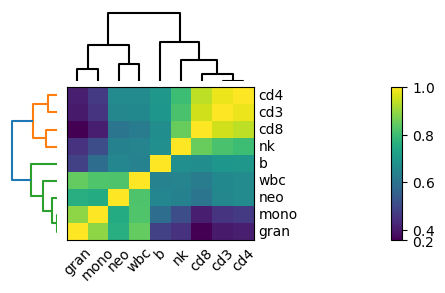

In [555]:
g = nhm(data=corr,figsize=(7, 3), linewidths=0)
rdendrogram_args = {'color_threshold':0.7}
g.hcluster(optimal_ordering=False)
fig, plots = g.run(rdendrogram_args=rdendrogram_args)

In [563]:
b=pd.read_csv('data/hmr/cd4.a',header=None)
b.shape

(43777, 7)

In [564]:
b['b']=b[[4,5]].min(1)
b['d']=b['b']-b[6]

In [590]:
man='https://github.com/zhou-lab/InfiniumAnnotationV1/raw/main/Anno/HM450/HM450.hg38.manifest.tsv.gz'
man=pd.read_table(man,index_col='Probe_ID',usecols=['Probe_ID','CpG_chrm','CpG_beg'])
man=man.groupby('CpG_chrm')['CpG_beg'].apply(list)

In [628]:
top=b.sort_values('d',ascending=False).head(1000)

In [629]:
def f(c,b,e):
    ins=[]
    for c in man[c]:
        if c > b and c<e:
            ins.append(b)
    return len(ins)
top['man']=top[[0,1,2]].apply(lambda x: f(x[0],x[1],x[2]),axis=1)

In [631]:
top[top[3]>20].head(30)

,0,1,2,3,4,5,6,b,d,man
38246,chr7,142784778,142793869,84,0.80,0.75,0.11,0.75,0.64,2
11621,chr14,22479508,22513795,252,0.74,0.74,0.12,0.74,0.62,25
29205,chr3,48268126,48269679,42,0.72,0.73,0.10,0.72,0.62,3
38491,chr7,155998203,155998646,26,0.73,0.72,0.10,0.72,0.62,2
34964,chr6,32189184,32193563,88,0.69,0.80,0.08,0.69,0.61,33
25174,chr2,234463676,234464486,22,0.72,0.70,0.09,0.70,0.61,1
18832,chr17,82126573,82127600,42,0.69,0.66,0.07,0.66,0.59,6
2375,chr1,116762922,116765103,22,0.68,0.67,0.08,0.67,0.59,1
34352,chr6,6614151,6615094,32,0.67,0.68,0.08,0.67,0.59,3
9491,chr12,55935403,55936787,35,0.79,0.76,0.17,0.76,0.59,5


In [158]:
cd8={}

In [181]:
cd8_['r']=cd8_.apply(lambda x: range(x[1],x[2]),axis=1)

In [224]:
dg=cd8_.head(10000).groupby(0)['r'].agg(size= len, r= lambda x: set(x))

In [225]:
dg['rr']=dg['r'].apply(lambda x:set([item for sublist in x for item in sublist]))

In [ ]:
#df=pd.read_table('data/dna.meth',header=None,nrows=10)[[0,1]]